<h1 align="center" style="color: blue; font-weight: bold;
font-family: 'Fira Code', monospace;">Practical Lab 4 - Polynomial Regression, R-Squared, MAPE</h1>



In this Notebook, I will walk you through the process of building and evaluating univariate polynomial regression models for predicting diabetes progression based on the body mass index (BMI) feature. Our goal is to provide a screening tool for physicians to identify patients at risk. I have followed a structured machine learning workflow to ensure clarity and ease of understanding.


#### Import the Packages

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### **Load the Data**

Diabetics Dataset

For each(n) of the 442 diabetes patients, ten initial characteristics were recorded, including age, gender, body mass index, average blood pressure, and six blood serum measurements. Additionally, the quantitative measure of disease progression one year after the initial assessment was also documented as the response of interest.

[Dataset Source link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)

Data characteristics

| Information               | Description                                                                        |
|---------------------------|---------------------------------------------------------------------------         |
| Number of Instances       | 442                                                                                |
| Number of Attributes      | First 10 columns are numeric predictive values                                     |
| Target                    | Column 11 is a quantitative measure of disease progression one year after baseline |
| Attribute Information     |                                                                                    |
|                           | age - age in years                                                                 |
|                           | sex                                                                                |
|                           | bmi - body mass index                                                              |
|                           | bp - average blood pressure                                                        |
|                           | s1 - tc, total serum cholesterol                                                   |
|                           | s2 - ldl, low-density lipoproteins                                                 |
|                           | s3 - hdl, high-density lipoproteins                                                |
|                           | s4 - tch, total cholesterol / HDL                                                  |
|                           | s5 - ltg, possibly log of serum triglycerides level                                |
|                           | s6 - glu, blood sugar level                                                        |


In [75]:
data = datasets.load_diabetes()

#### **Frame the Problem**

Task is to predict diabetes progression using univariate polynomial regression, with BMI as the independent variable and diabetes progression as the dependent variable.

### **Exploratory Data Analysis (EDA)**

In [76]:
X = data.data[:, np.newaxis, 2]  # Selecting only BMI feature
y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
EDA= df.describe()
print(EDA)
df.head()


                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


The data appears to be standardized, with means close to zero and standard deviations around 0.05 for most attributes. For example, the mean age is approximately 0, and the standard deviation is about 0.048.

#### **Histogram**

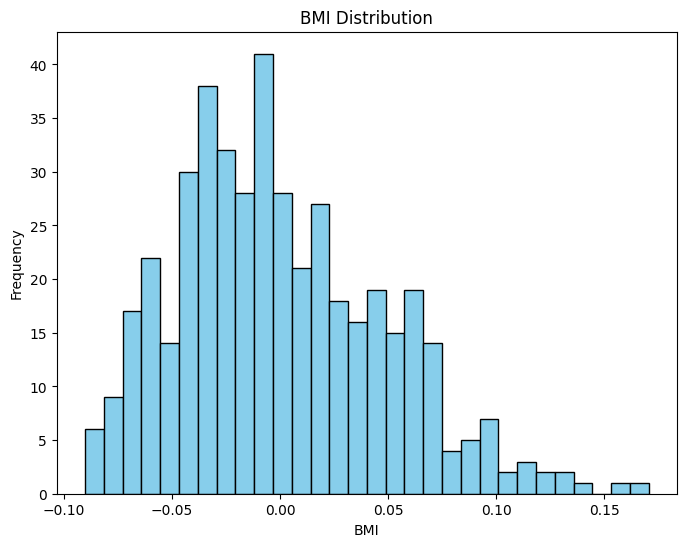

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(X, bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

By Observation, Most data points are clustered around a BMI value of 0, with fewer occurrences as the BMI values move away from 0 in both directions.

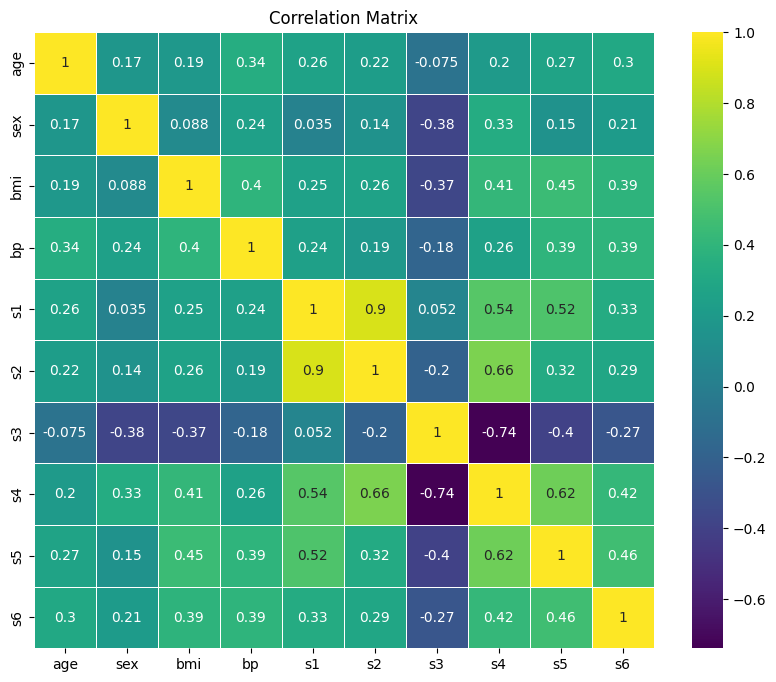

In [78]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Variables ‘s1’ and ‘s2’ exhibit a strong positive correlation of 0.9 (bright yellow color). This suggests that they tend to move together in the same direction. Variables ‘s3’ and ‘s4’ have a strong negative correlation of -0.74 (dark purple hue). This implies that they move in opposite directions. The remaining variables show varying degrees of correlation, which can impact data analysis and modeling.

#### **Clean the Data**

In [79]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


The values indicates that there are no missing values in any of the columns (attributes) of the dataset. Since it is normalised there is no need to clean the Data. 

#### **Data Evaluation**

In [80]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [81]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Degree 0 Coefficients: [0.]
Degree 1 Coefficients: [  0.        997.6480474]
Degree 2 Coefficients: [  0.         980.92202022 588.93160594]
Degree 3 Coefficients: [    0.           995.68277227   787.45218615 -3065.86288409]
Degree 4 Coefficients: [     0.           1138.06943905  -1382.14985081 -39998.22239695
 339310.99463778]
Degree 5 Coefficients: [ 0.00000000e+00  1.11154628e+03 -4.65954076e+03 -2.02974109e+04
  8.56191033e+05 -3.39362246e+06]


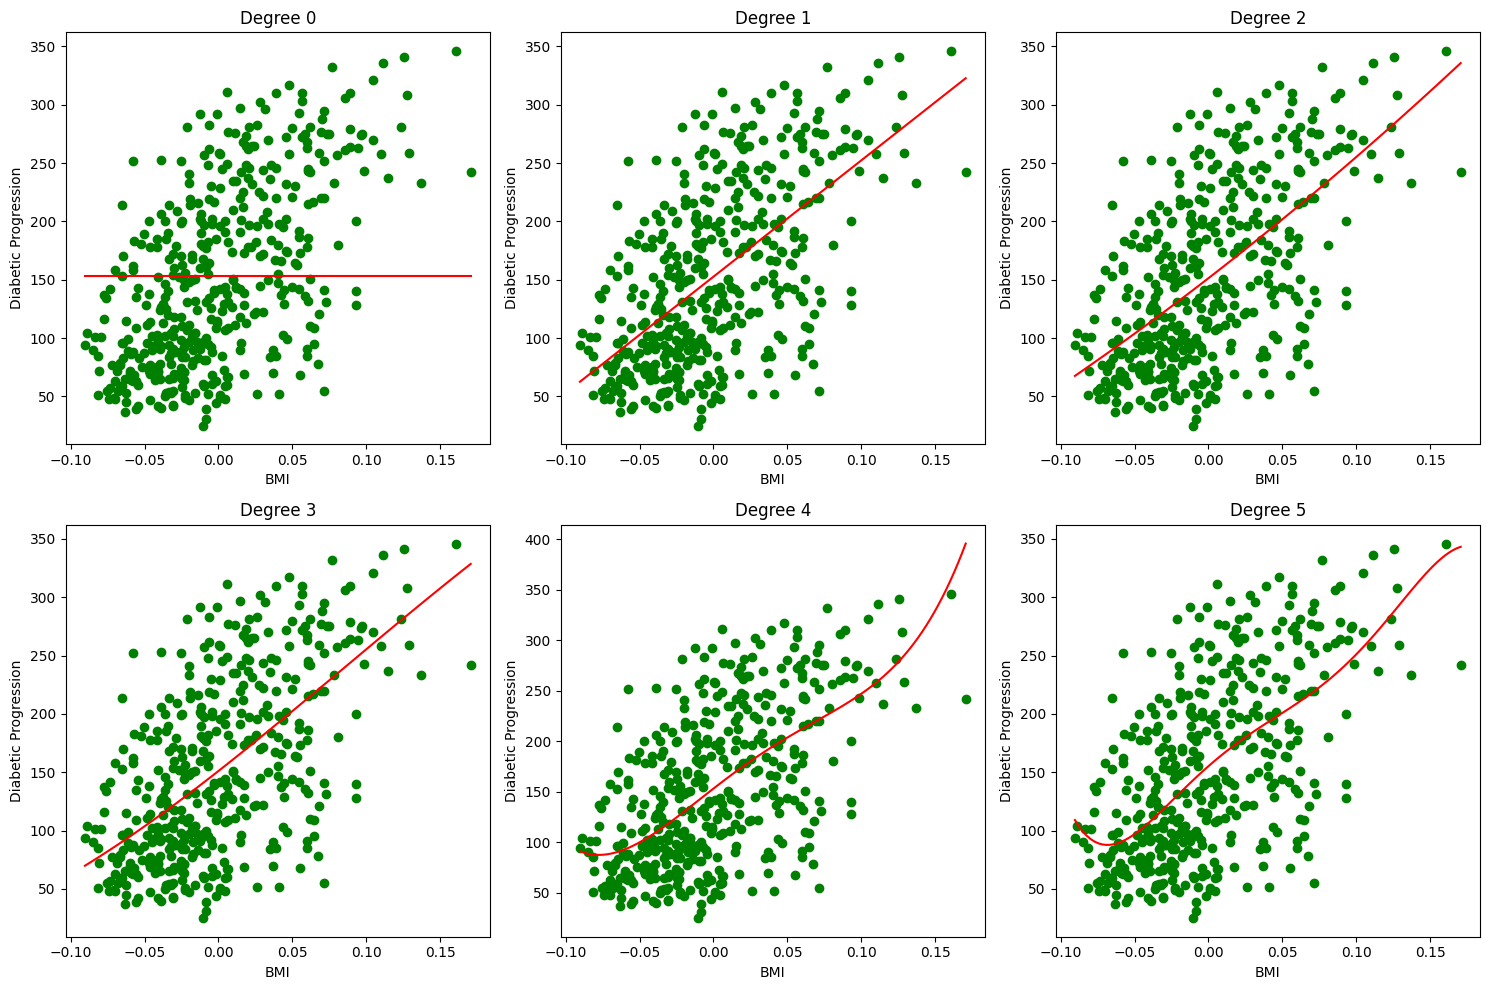

In [82]:

# Assuming X is the BMI feature and y is the disease progression
X = df['bmi'].values.reshape(-1, 1)
y = data.target

# Create empty lists to store the results
degree_range = range(6)
train_errors = []
val_errors = []

# Create a subplot for each degree
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, degree in enumerate(degree_range):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.15, random_state=42)
    
    # Fit the model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

    # Print the coefficients for each degree
    print(f"Degree {degree} Coefficients: {model.coef_}")

    # Plotting the fitted curve
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    axs[i].scatter(X, y, label='Actual Data', color='green')
    axs[i].plot(X_plot, y_plot, label=f'Degree {degree} Fit', color='red')
    axs[i].set_title(f'Degree {degree}')
    axs[i].set_xlabel('BMI')
    axs[i].set_ylabel('Diabetic Progression')

# Display the plots
plt.tight_layout()
plt.show()

Degree 0:
A horizontal red line, indicating that there is no relationship between BMI and the dependent variable in this model.Green dots are scattered without any clear pattern.

Degree 1 :
A linear relationship depicted by an inclined red line. The green dots show some alignment with the red line but are still widely dispersed.

Degree 2 :
The red line curves slightly upwards. Green dots are more aligned compared to Degree 1 but still show significant dispersion.

Degree 3 :
The green dots align relatively well with this model, showing less dispersion around the curve than previous models.

Degree 4 :
The red line has curves. It captures some patterns in data points, it starts to look overfitted as it tries to pass close to many individual points.

Degree 5 :
This plot shows an even more complex curve for fitting data points. It appears highly overfitted as it exhibits sharp turns to capture specific data points.

#### **Compare Models**

In [83]:
X = df['bmi'].values.reshape(-1, 1)
y = data.target

# Create empty lists to store the results
degree_range = range(6)
r2_scores = []
mape_scores = []
mae_scores = []

# Loop through different polynomial degrees
for degree in degree_range:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.15, random_state=42)
    
    # Fit the model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    r2_scores.append(r2_score(y_val, y_val_pred))
    mape_scores.append(np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100)
    mae_scores.append(mean_absolute_error(y_val, y_val_pred))

# Display the metrics for each degree
for degree, r2, mape, mae in zip(degree_range, r2_scores, mape_scores, mae_scores):
    print(f"Degree {degree}: R^2={r2:.4f}, MAPE={mape:.4f}%, MAE={mae:.4f}")

Degree 0: R^2=-0.0071, MAPE=61.2333%, MAE=64.1742
Degree 1: R^2=0.2048, MAPE=48.5188%, MAE=54.8704
Degree 2: R^2=0.2019, MAPE=48.4989%, MAE=54.9050
Degree 3: R^2=0.2055, MAPE=48.4024%, MAE=54.7257
Degree 4: R^2=0.1647, MAPE=48.0361%, MAE=55.1346
Degree 5: R^2=0.2004, MAPE=47.6275%, MAE=54.4506


The model with Degree 3 has the highest R-squared value (0.2055) and a relatively low MAE (54.7257), making it the best-performing model among the ones tested. Therefore, the polynomial regression model of degree 3 is recommended for predicting disease progression based on the BMI feature.

In [84]:
# Assuming the best_degree is the degree of the chosen model
best_degree = 3

# Create polynomial features for the chosen model
poly = PolynomialFeatures(best_degree)
X_poly = poly.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=42)

# Fit the chosen model on the training data
chosen_model = LinearRegression()
chosen_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = chosen_model.predict(X_test)

# Calculate metrics on the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Chosen Model (Degree {best_degree}) Test Metrics: R^2={test_r2:.4f}, MSE={test_mse:.4f}, MAE={test_mae:.4f}")

Chosen Model (Degree 3) Test Metrics: R^2=0.2055, MSE=4340.4609, MAE=54.7257


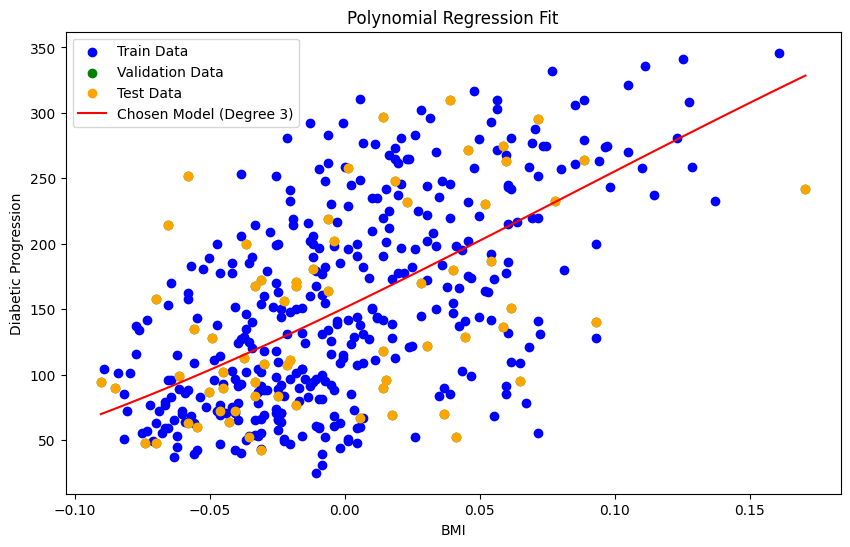

In [85]:
# Assuming you've chosen the best degree and fitted the model as 'chosen_model'
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X_train[:, 1], y_train, label='Train Data', color='blue')
plt.scatter(X_val[:, 1], y_val, label='Validation Data', color='green')
plt.scatter(X_test[:, 1], y_test, label='Test Data', color='orange')

# Plot the fitted curve for the chosen model on each set
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot_train = chosen_model.predict(poly.transform(X_plot))
plt.plot(X_plot[:, 0], y_plot_train, label=f'Chosen Model (Degree {best_degree})', color='red')

plt.title('Polynomial Regression Fit')
plt.xlabel('BMI')
plt.ylabel('Diabetic Progression')
plt.legend()
plt.show()


#### **Equation of the Best Model**

In [86]:
equation_coefficients = chosen_model.coef_
equation_intercept = chosen_model.intercept_

equation = f"Diabetes Progression = {equation_intercept:.2f} + {equation_coefficients[1]:.2f} * BMI + {equation_coefficients[2]:.2f} * BMI^2 + {equation_coefficients[3]:.2f} * BMI^3"
print(equation)


Diabetes Progression = 151.03 + 995.68 * BMI + 787.45 * BMI^2 + -3065.86 * BMI^3


In [2]:
manual_bmi_value = 25

# Manually calculate
manual_diabetes_progression = (equation_intercept +
                                model.coef_[1] * manual_bmi_value +
                                model.coef_[2] * manual_bmi_value**2 +
                                model.coef_[3] * manual_bmi_value**3)

# Use model.predict()
model_prediction = chosen_model.predict(poly.transform([[1, manual_bmi_value, manual_bmi_value**2, manual_bmi_value**3]]))[0]

# Comparison
comparison = {'Manual Calculation': manual_diabetes_progression, 'Model Prediction': model_prediction}
print(comparison)


NameError: name 'equation_intercept' is not defined

#### **Trainable Parameters**

In [89]:
degrees = range(6)
trainable_parameters = []

for degree in degrees:
    poly_degree = PolynomialFeatures(degree=degree)
    X_poly_degree = poly_degree.fit_transform(X)
    trainable_parameters.append(len(poly_degree.get_feature_names_out()))

print(trainable_parameters)


[1, 2, 3, 4, 5, 6]
